### Урок 3.2 Видеоурок “Введение в аналитическую геометрию. Графики на плоскости”

### -- Автор: Шенк Евгений Станиславович

### Задание 1

In [1]:
import math
import itertools
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

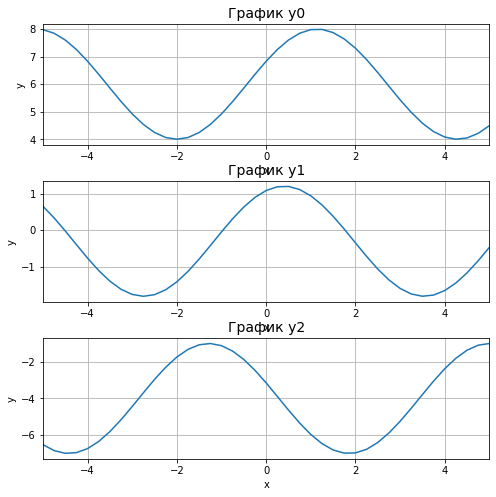

In [2]:
fig, ax = plt.subplots(nrows=3, ncols=1)
ax1, ax2, ax3 = ax.flatten()
fig.set_size_inches(8, 8)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

x = np.linspace(-5, 5, 41)
y = [0, 0, 0]
a = [-2, 0.4, 5]
b = [6, -0.3, -4]
k = [-2, 1.5, 3]
i = 0

while i < 3:
    y[i] = k[i] * np.cos(x - a[i]) + b[i]
    ax[i].plot(x, y[i])
    ax[i].set_title(f'График y{i}', fontsize=14)
    ax[i].set_xlim([-5,5])
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].grid()
    i += 1

### Задание 3

In [3]:
def polar_to_dec(phi ,r , m = 'rad'): # Перевод точки из полярных координат в декартовы
    if m == 'rad':
        x = r * np.cos(phi)
        y = r * np.sin(phi)
    elif m == 'deg':
        x = r * np.cos(phi * np.pi / 180)
        y = r * np.sin(phi * np.pi / 180) 
    else:
        print('Единица измерения указана неверно: rad - радианы, deg - градусы')
        return None
    return x, y

In [4]:
polar_to_dec(5/4 * np.pi ,1.4142135623730951, 'rad')

(-1.0000000000000002, -1.0)

In [5]:
def decard_to_pol(x ,y): # Перевод точки из декартовых координат в полярные
    r = np.sqrt(y**2 + x**2)
    if (x > 0 and y >= 0):
        phi = np.arctan(y / x)
    elif (x > 0 and y < 0):
        phi = np.arctan(y / x) + 2 * np.pi
    elif (x < 0):
        phi = np.arctan(y / x) + np.pi 
    elif (x == 0 and y > 0):
        phi = np.pi / 2
    elif (x == 0 and y < 0):
        phi = 3 * np.pi / 2
    else: #(x == 0 and y == 0):
        phi = None
    return phi, r

In [6]:
decard_to_pol(1 ,-1)

(5.497787143782138, 1.4142135623730951)

In [7]:
# Построение окружности в полярной системе координат
# a - радиус окружности
def curcle_polar(a):
    phi = np.linspace(0, 2 * np.pi, 101)
    r = np.linspace(a, a, 101)
    
    plt.polar(phi, r)

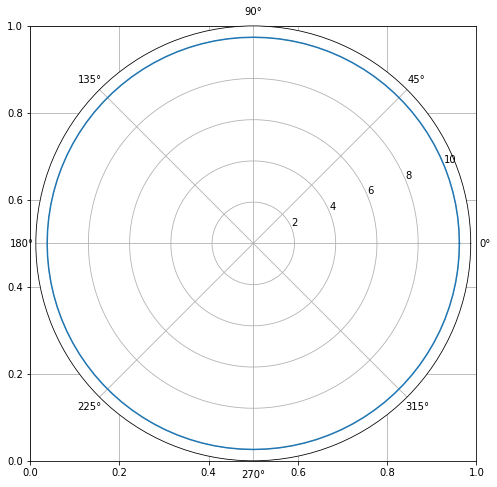

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 8)
plt.grid()

curcle_polar(10)

In [9]:
# Построение отрезка в полярной системе координат по двум точкам
# phi_1, r_1, phi_2, r_2 - координаты точек
def line_polar(phi_1, r_1, phi_2, r_2):
    phi = [phi_1, phi_2]
    r = [r_1, r_2]
    
    plt.polar(phi, r)

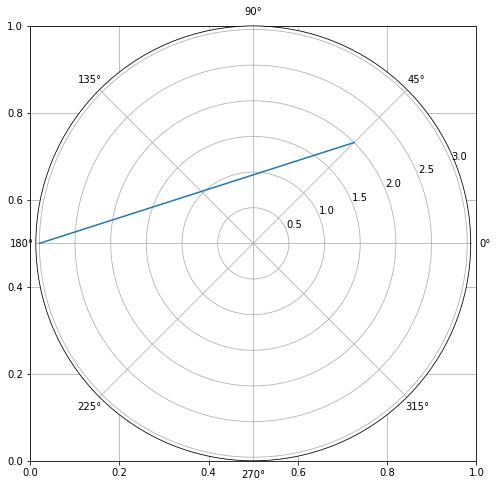

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 8)
plt.grid()

line_polar(np.pi / 4, 2, 1 * np.pi, 3)

### Задание 4

##### 1) Решите систему уравнений:
##### y = x2 – 1
##### exp(x) + x∙(1 – y) = 1

[0.0, 0.4000173583, 2.6181455731, 4.2001058412, -1.5818353529]


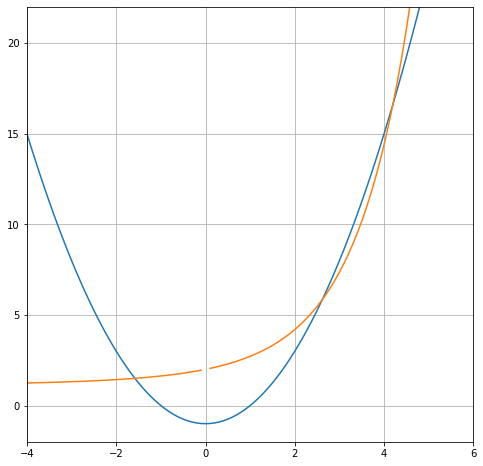

In [11]:
def y1(x):
    return (x**2 - 1)

def y2(x):
    return ((-1 + np.exp(x) + x) / x)

def solve(f_1, f_2, x0):
    return fsolve(lambda x : y1(x) - y2(x), x0)

x = np.linspace (-5, 5, 101)

y_1 = []
y_2 = []

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 8)
plt.axis([-4, 6, -2, 22])
plt.grid()

result = []
for x_ in x: 
    result.append(np.round(float(solve(y1, y2, x_)), 10))
result = list(set(result))
print(result)

y_1 = x**2 - 1
y_2 = (-1 + np.exp(x) + x) / x
    
plt.plot(x, y_1)
plt.plot(x, y_2)

##### Исходя из результатов расчета численным методом и графика ответами являются: 
##### x1 = 2.6181455731, x2 = 4.2001058412, x3 = -1.5818353529

##### 2) Решите систему уравнений и неравенств:
##### y = x2 – 1
##### exp(x) + x∙(1 – y) > 1

In [12]:
# Берем две точки по разные стороны от линии графика
# Над графиком
x_t = 2
y_t = 10
np.exp(x_t) + x_t * (1 - y_t)

-10.61094390106935

In [13]:
# Под графиком
x_t = 2
y_t = 1
np.exp(x_t) + x_t * (1 - y_t)

7.38905609893065

##### Условие соблюдается для всех точек под графиком, следовательно 
##### ответ: x принадлежит (-1.5818353529, 2.6181455731) и (4.2001058412, +infinity)